In [2]:
!pip install scikit-learn --upgrade
!pip install scipy --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)
Requirement already up-to-date: scipy in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.5.2)


In [3]:
!pip install pydot

In [4]:
import keras
import pydot

Using TensorFlow backend.


<hr>

## Descargue el conjunto de datos del desafío en formato .csv

In [5]:
import pandas as pd

!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset.tail()

--2020-09-17 14:12:00--  https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 654532 (639K) [text/plain]
Saving to: ‘train_dataset_digitalhouse.csv.4’

100%[======================================>] 654,532     --.-K/s   in 0.03s   

2020-09-17 14:12:00 (24.4 MB/s) - ‘train_dataset_digitalhouse.csv.4’ saved [654532/654532]



,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
8990,9995,29.0,MASCULINO,ARGENTINA,TERTIARY,DEVELOPMENT,NaN,4.0,4701.6,9.1,86.0
8991,9996,34.0,NaN,ARGENTINA,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.4,4646.2,16.8,95.0
8992,9997,28.0,FEMENINO,ARGENTINA,POST_GRADUATE,ENGINEERING,EJECUTIVO,NaN,3315.1,5.6,95.0
8993,9998,23.0,MASCULINO,MEXICO,TERTIARY,ENGINEERING,PROGRAMACION,3.3,4437.8,0.9,87.0
8994,9999,36.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,DATA,3.4,4600.8,19.6,88.0


## En el conjunto de datos proporcionado, tenemos las siguientes columnas:

* Unnamed: 0
* EDAD
* GENERO
* RESIDENCIA
* NV_ESTUDIO
* ESTUDIO_PREV
* TRACK_DH
* AVG_DH
* MINUTES_DH
* EXPERIENCIA
* **DIAS_EMP = El valor "target" que se va a predecir**

Podemos verificar fácilmente que faltan valores usando el siguiente código:

```df_training_dataset.info()```

Debe manejar cuidadosamente estos valores faltantes antes de crear un modelo de regresión.

In [6]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 11 columns):
Unnamed: 0      8995 non-null int64
EDAD            7668 non-null float64
GENERO          7620 non-null object
RESIDENCIA      7638 non-null object
NV_ESTUDIO      7623 non-null object
ESTUDIO_PREV    7665 non-null object
TRACK_DH        7714 non-null object
AVG_DH          7651 non-null float64
MINUTES_DH      7619 non-null float64
EXPERIENCIA     7618 non-null float64
DIAS_EMP        8995 non-null float64
dtypes: float64(5), int64(1), object(5)
memory usage: 773.1+ KB


In [7]:
df_training_dataset['GENERO'].value_counts()

MASCULINO    5230
FEMENINO     2390
Name: GENERO, dtype: int64

In [8]:
#@title Observando valores nulos
print(df_training_dataset.shape)
100*df_training_dataset.isnull().sum()/df_training_dataset.shape[0]

(8995, 11)


Unnamed: 0       0.000000
EDAD            14.752640
GENERO          15.286270
RESIDENCIA      15.086159
NV_ESTUDIO      15.252918
ESTUDIO_PREV    14.785992
TRACK_DH        14.241245
AVG_DH          14.941634
MINUTES_DH      15.297387
EXPERIENCIA     15.308505
DIAS_EMP         0.000000
dtype: float64

In [9]:
df_training_dataset['ESTUDIO_PREV'] = df_training_dataset['ESTUDIO_PREV'].replace({"MARKETING":"ESTUDIO_MARKETING"})
df_training_dataset['TRACK_DH'] = df_training_dataset['TRACK_DH'].replace({"MARKETING":"TRACK_MARKETING"})

In [10]:
#@title tipo de variables
types = pd.DataFrame(df_training_dataset.dtypes)
print(types.groupby(0).size())

0
int64      1
float64    5
object     5
dtype: int64


In [11]:
#@title Evaluando variables categoricas

categoricas = types.index[types[0]=='O'].values
for line in categoricas:
  print("La variable "+ line +" contiene:",str(len(df_training_dataset[line].unique()))+" distintos valores")

La variable GENERO contiene: 3 distintos valores
La variable RESIDENCIA contiene: 4 distintos valores
La variable NV_ESTUDIO contiene: 4 distintos valores
La variable ESTUDIO_PREV contiene: 6 distintos valores
La variable TRACK_DH contiene: 5 distintos valores


In [12]:
#@title Creando variables dummies
df = df_training_dataset.copy()
for col in categoricas:
  df = pd.concat([df,(pd.get_dummies(df[col])).astype(int)], axis=1)
  df.drop(columns=[col],inplace=True)

df.drop(["Unnamed: 0"],axis=1, inplace=True)
#df['EXPERIENCIA'] = df['EXPERIENCIA'] * 30.417
print(df.shape)
df.tail(5)

(8995, 22)


,EDAD,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP,FEMENINO,MASCULINO,ARGENTINA,BRAZIL,MEXICO,...,UNIVERSITARY,BUSINESS,COMMERCIAL,DEVELOPMENT,ENGINEERING,ESTUDIO_MARKETING,DATA,EJECUTIVO,PROGRAMACION,TRACK_MARKETING
8990,29.0,4.0,4701.6,9.1,86.0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8991,34.0,3.4,4646.2,16.8,95.0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
8992,28.0,NaN,3315.1,5.6,95.0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
8993,23.0,3.3,4437.8,0.9,87.0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
8994,36.0,3.4,4600.8,19.6,88.0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,0,0


In [13]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='median',
    fill_value=0,
    verbose=0,
    copy=True
)

In [14]:
print("Valores nulos del df_training_dataset antes de la transformación SimpleImputer: \n\n{}\n".format(df.isnull().sum(axis = 0)))
# Aplicando la transformación ``SimpleImputer`` en conjunto de datos base
impute_zeros.fit(X=df)

# Reconstruyendo un Pandas DataFrame con los resultados
df = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df
    ),
    columns=df.columns
)

# Mostrando los datos nulos del dataset despues de la segunda transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación SimpleImputer: 

EDAD                 1327
AVG_DH               1344
MINUTES_DH           1376
EXPERIENCIA          1377
DIAS_EMP                0
FEMENINO                0
MASCULINO               0
ARGENTINA               0
BRAZIL                  0
MEXICO                  0
POST_GRADUATE           0
TERTIARY                0
UNIVERSITARY            0
BUSINESS                0
COMMERCIAL              0
DEVELOPMENT             0
ENGINEERING             0
ESTUDIO_MARKETING       0
DATA                    0
EJECUTIVO               0
PROGRAMACION            0
TRACK_MARKETING         0
dtype: int64

Valores nulos del df_training_dataset despues de la transformación SimpleImputer: 

EDAD                 0
AVG_DH               0
MINUTES_DH           0
EXPERIENCIA          0
DIAS_EMP             0
FEMENINO             0
MASCULINO            0
ARGENTINA            0
BRAZIL               0
MEXICO               0
POST_GRADUATE     

In [15]:
#Guardando Dataset
df.to_csv("train.csv", index=False)

In [16]:
types = pd.DataFrame(df.dtypes)
print("Tipos de variables", types.groupby(0).size())

Tipos de variables 0
float64    22
dtype: int64


In [17]:
#@title Dividiendo features y Target

features = df.drop(["DIAS_EMP"],axis=1) # Eliminando variable a predecir de nuestras etiquetas
target = df["DIAS_EMP"] # Variable objetivo de nuestra regresion


In [18]:
print(features.shape)
features.tail(5)

(8995, 21)


,EDAD,AVG_DH,MINUTES_DH,EXPERIENCIA,FEMENINO,MASCULINO,ARGENTINA,BRAZIL,MEXICO,POST_GRADUATE,...,UNIVERSITARY,BUSINESS,COMMERCIAL,DEVELOPMENT,ENGINEERING,ESTUDIO_MARKETING,DATA,EJECUTIVO,PROGRAMACION,TRACK_MARKETING
8990,29.0,4.0,4701.6,9.1,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8991,34.0,3.4,4646.2,16.8,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8992,28.0,3.5,3315.1,5.6,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8993,23.0,3.3,4437.8,0.9,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8994,36.0,3.4,4600.8,19.6,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<h2>Separando datos (Train,test,validation)</h2>

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2, random_state=2020)

In [20]:
#Set de evaluación 90% --> 10%

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=2020)

In [21]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
y_val=y_val.values.reshape(-1,1)

In [22]:
print("x_train:",x_train.shape)
print("x_test;",x_test.shape)
print("x_val:",x_val.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
print("y_val:",y_val.shape)

x_train: (6476, 21)
x_test; (1799, 21)
x_val: (720, 21)
y_train: (6476, 1)
y_test: (1799, 1)
y_val: (720, 1)


In [23]:
#Nomalizando variables features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

#Scalando variable target
scaler1 = StandardScaler()
scaler1.fit(y_train)
y_train_scaled = scaler1.transform(y_train)
y_val_scaled = scaler1.transform(y_val)
y_test_scaled = scaler1.transform(y_test)

<h2>Arquitectura</h2>

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

model = Sequential()
model.add(Dense(64, input_dim = x_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="linear"))
model.compile(optimizer = "adam", loss="mse",metrics=["mean_absolute_error"])

print(model.summary())



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 4,577
Trainable params: 4,577
Non-trainable params: 0
___________________

In [25]:
from keras.utils import plot_model
plot_model(model, to_file='modelo.png', show_shapes = True)

In [26]:
history = model.fit(x_train_scaled,y_train_scaled,validation_data = (x_val_scaled,y_val_scaled),epochs=30, batch_size=1024)

Instructions for updating:
Use tf.cast instead.
Train on 6476 samples, validate on 720 samples
Epoch 1/30
6476/6476 [==============================] - 2s 313us/step - loss: 1.0332 - mean_absolute_error: 0.8574 - val_loss: 0.9685 - val_mean_absolute_error: 0.8226
Epoch 2/30
6476/6476 [==============================] - 1s 164us/step - loss: 0.8033 - mean_absolute_error: 0.7420 - val_loss: 0.7808 - val_mean_absolute_error: 0.7210
Epoch 3/30
6476/6476 [==============================] - 0s 21us/step - loss: 0.6273 - mean_absolute_error: 0.6460 - val_loss: 0.5666 - val_mean_absolute_error: 0.6126
Epoch 4/30
6476/6476 [==============================] - 0s 24us/step - loss: 0.4706 - mean_absolute_error: 0.5552 - val_loss: 0.3926 - val_mean_absolute_error: 0.4985
Epoch 5/30
6476/6476 [==============================] - 0s 24us/step - loss: 0.3514 - mean_absolute_error: 0.4629 - val_loss: 0.2969 - val_mean_absolute_error: 0.4153
Epoch 6/30
6476/6476 [==============================] - 0s 21us/step

## Evaluación del modelo

In [27]:
result = model.evaluate(x_test_scaled,y_test_scaled)
for i in range(len(model.metrics_names)):
  print("Metric",model.metrics_names[i],":",
  str(round(result[i],2)))

1799/1799 [==============================] - 0s 216us/step
Metric loss : 0.23
Metric mean_absolute_error : 0.35


In [28]:
model.save("Prediccion.h5")

# Validación Grafica RN 

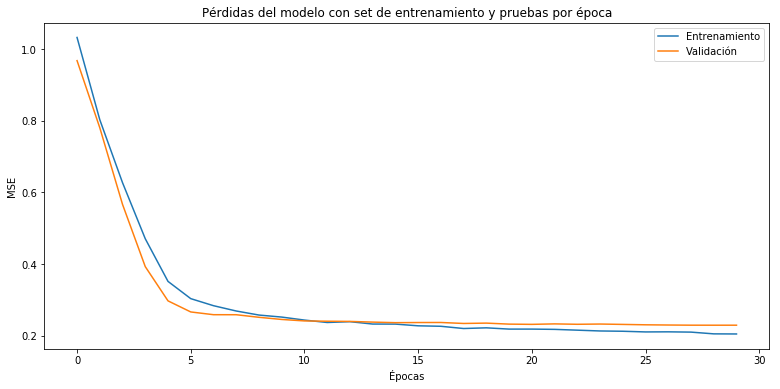

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('MSE')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento','Validación'],loc='upper right')
plt.show()

## Predicciones del modelo

In [30]:
real = pd.DataFrame(y_train)
predic=model.predict(pd.DataFrame(x_train_scaled))
valores_rescalados = scaler1.inverse_transform(predic)
pred_escal = pd.DataFrame(valores_rescalados)

for i in range(0,30):
  print(f'Real={real[0][i]}, Prediccion={"{0:.3f}".format(pred_escal[0][i])}')

Real=85.0, Prediccion=87.371
Real=86.0, Prediccion=84.877
Real=83.0, Prediccion=83.799
Real=86.0, Prediccion=85.872
Real=95.0, Prediccion=97.093
Real=92.0, Prediccion=89.498
Real=84.0, Prediccion=83.753
Real=87.0, Prediccion=85.199
Real=96.0, Prediccion=90.329
Real=86.0, Prediccion=84.950
Real=88.0, Prediccion=89.613
Real=84.0, Prediccion=86.978
Real=98.0, Prediccion=96.770
Real=93.0, Prediccion=95.004
Real=94.0, Prediccion=95.313
Real=91.0, Prediccion=89.809
Real=99.0, Prediccion=97.900
Real=85.0, Prediccion=86.368
Real=88.0, Prediccion=87.534
Real=89.0, Prediccion=90.520
Real=88.0, Prediccion=90.502
Real=88.0, Prediccion=86.290
Real=94.0, Prediccion=93.239
Real=88.0, Prediccion=89.629
Real=83.0, Prediccion=86.683
Real=103.0, Prediccion=101.297
Real=82.0, Prediccion=84.106
Real=95.0, Prediccion=96.146
Real=84.0, Prediccion=86.770
Real=85.0, Prediccion=86.316


<h2>Evaluando Datos</h2>

In [31]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_digitalhouse.csv')
df_to_be_scored.tail()


--2020-09-17 14:12:13--  https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67308 (66K) [text/plain]
Saving to: ‘to_be_scored_digitalhouse.csv.4’

100%[======================================>] 67,308      --.-K/s   in 0.004s  

2020-09-17 14:12:13 (17.8 MB/s) - ‘to_be_scored_digitalhouse.csv.4’ saved [67308/67308]



,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,Unnamed: 10
995,995,33.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,PROGRAMACION,3.6,4576.5,15.1,NaN
996,996,40.0,MASCULINO,ARGENTINA,TERTIARY,COMMERCIAL,PROGRAMACION,3.4,4542.9,26.1,NaN
997,997,NaN,FEMENINO,ARGENTINA,UNIVERSITARY,ENGINEERING,DATA,3.4,NaN,27.4,NaN
998,998,NaN,MASCULINO,MEXICO,UNIVERSITARY,ENGINEERING,DATA,3.7,4730.4,1.1,NaN
999,999,36.0,NaN,ARGENTINA,UNIVERSITARY,NaN,PROGRAMACION,3.3,4506.5,20.4,NaN


In [32]:
df_to_be_scored['ESTUDIO_PREV'] = df_to_be_scored['ESTUDIO_PREV'].replace({"MARKETING":"ESTUDIO_MARKETING"})
df_to_be_scored['TRACK_DH'] = df_to_be_scored['TRACK_DH'].replace({"MARKETING":"TRACK_MARKETING"})

In [33]:
df2 = df_to_be_scored.copy()
for col in categoricas:
  df2 = pd.concat([df2,(pd.get_dummies(df2[col])).astype(int)], axis=1)
  df2.drop(columns=[col],inplace=True)

df2.drop(["Unnamed: 0","Unnamed: 10"],axis=1, inplace=True)
#df2['EXPERIENCIA'] = df2['EXPERIENCIA'] * 30.417
print(df2.shape)
df2.head(3)

(1000, 21)


,EDAD,AVG_DH,MINUTES_DH,EXPERIENCIA,FEMENINO,MASCULINO,ARGENTINA,BRAZIL,MEXICO,POST_GRADUATE,...,UNIVERSITARY,BUSINESS,COMMERCIAL,DEVELOPMENT,ENGINEERING,ESTUDIO_MARKETING,DATA,EJECUTIVO,PROGRAMACION,TRACK_MARKETING
0,43.0,3.8,4557.9,NaN,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,42.0,3.5,4656.2,25.6,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,35.0,4.0,4695.2,19.0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [34]:
print("Valores nulos del df_training_dataset antes de la transformación SimpleImputer: \n\n{}\n".format(df2.isnull().sum(axis = 0)))
# Aplicando la transformación ``SimpleImputer`` en conjunto de datos base
impute_zeros.fit(X=df2)

# Reconstruyendo un Pandas DataFrame con los resultados
df2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df2
    ),
    columns=df2.columns
)

# Mostrando los datos nulos del dataset despues de la segunda transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df2.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación SimpleImputer: 

EDAD                 139
AVG_DH               160
MINUTES_DH           164
EXPERIENCIA          145
FEMENINO               0
MASCULINO              0
ARGENTINA              0
BRAZIL                 0
MEXICO                 0
POST_GRADUATE          0
TERTIARY               0
UNIVERSITARY           0
BUSINESS               0
COMMERCIAL             0
DEVELOPMENT            0
ENGINEERING            0
ESTUDIO_MARKETING      0
DATA                   0
EJECUTIVO              0
PROGRAMACION           0
TRACK_MARKETING        0
dtype: int64

Valores nulos del df_training_dataset despues de la transformación SimpleImputer: 

EDAD                 0
AVG_DH               0
MINUTES_DH           0
EXPERIENCIA          0
FEMENINO             0
MASCULINO            0
ARGENTINA            0
BRAZIL               0
MEXICO               0
POST_GRADUATE        0
TERTIARY             0
UNIVERSITARY         0
BUSINESS           

In [35]:
scaler = StandardScaler()
scaler.fit(df2)
x_train_scaled_2 = scaler.transform(df2)

In [36]:
x_train_scaled_2

array([[ 1.96018782,  0.7894251 ,  0.15428428, ..., -0.25709547,
         1.30768005, -0.36927447],
       [ 1.73829651, -0.04447465,  0.36045753, ..., -0.25709547,
        -0.76471305, -0.36927447],
       [ 0.18505735,  1.34535827,  0.44225566, ..., -0.25709547,
        -0.76471305, -0.36927447],
       ...,
       [-0.03683396, -0.32244124,  0.19319083, ..., -0.25709547,
        -0.76471305, -0.36927447],
       [-0.03683396,  0.51145852,  0.51608372, ..., -0.25709547,
        -0.76471305, -0.36927447],
       [ 0.40694866, -0.60040782,  0.04647854, ..., -0.25709547,
         1.30768005, -0.36927447]])

In [37]:
predic=model.predict(pd.DataFrame(x_train_scaled_2))
valores_rescalados = scaler1.inverse_transform(predic)
pred_escal = pd.DataFrame(valores_rescalados)
df2['target'] = pred_escal

for i in range(0,20):
  print(f'{i},Prediccion={"{0:.3f}".format(pred_escal[0][i])}')


0,Prediccion=88.985
1,Prediccion=101.470
2,Prediccion=98.075
3,Prediccion=93.620
4,Prediccion=86.732
5,Prediccion=84.179
6,Prediccion=82.758
7,Prediccion=98.326
8,Prediccion=100.032
9,Prediccion=92.343
10,Prediccion=94.771
11,Prediccion=98.517
12,Prediccion=99.121
13,Prediccion=88.779
14,Prediccion=93.641
15,Prediccion=89.412
16,Prediccion=95.248
17,Prediccion=90.208
18,Prediccion=98.785
19,Prediccion=94.111


In [38]:
df2.head(10)

,EDAD,AVG_DH,MINUTES_DH,EXPERIENCIA,FEMENINO,MASCULINO,ARGENTINA,BRAZIL,MEXICO,POST_GRADUATE,...,BUSINESS,COMMERCIAL,DEVELOPMENT,ENGINEERING,ESTUDIO_MARKETING,DATA,EJECUTIVO,PROGRAMACION,TRACK_MARKETING,target
0,43.0,3.8,4557.90,16.7,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,88.984535
1,42.0,3.5,4656.20,25.6,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,101.469635
2,35.0,4.0,4695.20,19.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,98.075150
3,35.0,4.1,4778.20,18.4,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,93.619507
4,36.0,4.0,4722.30,19.1,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,86.732124
5,26.0,3.7,4576.45,2.7,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,84.179459
6,20.0,3.6,4576.45,0.5,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,82.757858
7,37.0,3.3,4349.00,21.5,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,98.325897
8,37.0,3.2,4368.10,21.6,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,100.032433
9,34.0,3.7,4711.80,26.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,92.342911


In [39]:
df2.shape

(1000, 22)

In [40]:
project.save_data(file_name="results.csv", data=df2.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio8-donotdelete-pr-ztj6hurk60l0cu',
 'asset_id': '5972b00a-19bc-4004-bdbb-d529693b645e'}